# 1) Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2) Import Dataset

In [2]:
salary=pd.read_csv('Employee_Salary.csv')

In [6]:
salary.head(10)

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448
5,2.682068,69119.79132
6,2.761983,71063.36476
7,2.927601,71356.14382
8,2.969968,74265.40359
9,3.059107,74804.11404


In [7]:
salary.tail(10)

,Years of Experience,Salary
1990,18.583977,374277.2253
1991,18.806528,390051.2268
1992,18.817387,392165.2403
1993,19.063416,413149.8396
1994,19.164009,420555.4056
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [9]:
salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [10]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


# 3) Visualize data


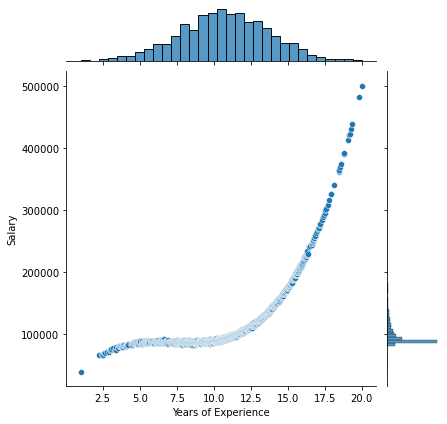

In [11]:
sns.jointplot(x='Years of Experience',y='Salary',data=salary)

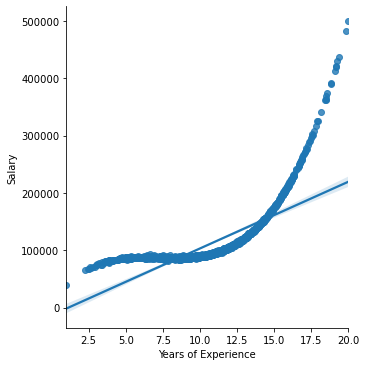

In [12]:
sns.lmplot(x='Years of Experience',y='Salary',data=salary)

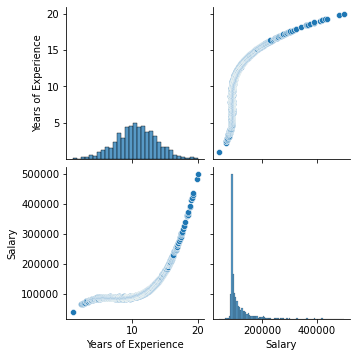

In [14]:
sns.pairplot(data=salary)

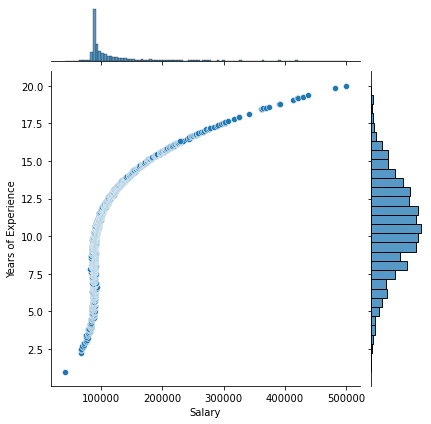

In [15]:
sns.jointplot(x='Salary',y='Years of Experience',data=salary)

# 4) Create Training dataset

In [16]:
X=salary[['Years of Experience']]

In [17]:
X

,Years of Experience
0,1.000000
1,2.257942
2,2.450875
3,2.498713
4,2.613729
...,...
1995,19.178575
1996,19.254499
1997,19.353369
1998,19.842520


In [18]:
X.shape

(2000, 1)

In [19]:
y=salary[['Salary']]

In [20]:
y

,Salary
0,40000.00000
1,65979.42119
2,67253.57549
3,67342.43510
4,70532.20448
...,...
1995,421534.69100
1996,430478.02650
1997,438090.84540
1998,482242.16080


In [22]:
X_train=X
y_train=y

# 5) Model Training

In [23]:
X_train.shape

(2000, 1)

In [24]:
y_train.shape

(2000, 1)

In [25]:
from sklearn.linear_model import LinearRegression

In [44]:
regressor=LinearRegression(fit_intercept=False)

In [45]:
regressor.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [46]:
print('Linear Model coeff(m): ',regressor.coef_)
print('Linear Model coeff(b): ',regressor.intercept_)

Linear Model coeff(m):  [[10511.28514602]]
Linear Model coeff(b):  0.0


In [47]:
#Fit_intercep=False
# Linear Model coeff(m):  [[10511.28514602]]
# Linear Model coeff(b):  0.0


#Fit_intercep=True
# Linear Model coeff(m):  [[11640.22916165]]
# Linear Model coeff(b):  [-13063.09931519]

# Visualize the result

Text(0.5, 1.0, 'Salary Vs. Years of experience (Linear)')

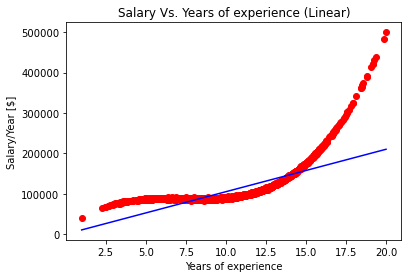

In [49]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.xlabel('Years of experience')
plt.ylabel('Salary/Year [$]')
plt.title('Salary Vs. Years of experience (Linear)')

# 5) Model Training (Using Polynomial Assumption)

In [50]:
from sklearn.preprocessing import PolynomialFeatures 

In [101]:
poly_regressor=PolynomialFeatures(degree=5)

In [102]:
X_columns=poly_regressor.fit_transform(X_train)

In [103]:
X_columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.25794198e+00, 5.09830199e+00, 1.15116701e+01,
        2.59926832e+01, 5.86899707e+01],
       [1.00000000e+00, 2.45087546e+00, 6.00679053e+00, 1.47218955e+01,
        3.60815324e+01, 8.84313424e+01],
       ...,
       [1.00000000e+00, 1.93533688e+01, 3.74552884e+02, 7.24886009e+03,
        1.40289863e+05, 2.71508145e+06],
       [1.00000000e+00, 1.98425197e+01, 3.93725587e+02, 7.81250771e+03,
        1.55019838e+05, 3.07598419e+06],
       [1.00000000e+00, 2.00000000e+01, 4.00000000e+02, 8.00000000e+03,
        1.60000000e+05, 3.20000000e+06]])

In [104]:
regressor=LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression()

In [105]:
print('Model coefficient [m]: ', regressor.coef_)

Model coefficient [m]:  [[ 0.00000000e+00  3.27949771e+04 -4.65578675e+03  2.24001236e+02
  -1.03521070e+00  2.09284278e-02]]


In [95]:
#Here, in polynomial degree 1 coefficient is for constant term and the others are non-constant and is qual to the no. of degree

# When Polnomial degree=2
#Model coefficient [m]:  [[     0.         -33106.32895617   2095.78613853]]

# When Polnomial degree=3
# Model coefficient [m]:  [[    0.         32261.24327461 -4503.00578987   205.20736238]]

# When Polnomial degree=5
# Model coefficient [m]:  [[ 0.00000000e+00  3.27949771e+04 -4.65578675e+03  2.24001236e+02
  #-1.03521070e+00  2.09284278e-02]]

# 6) Visualize the results

In [106]:
y_predict=regressor.predict(poly_regressor.fit_transform(X_train))

In [107]:
y_predict

array([[ 39824.51537306],
       [ 64327.83549236],
       [ 67134.62845988],
       ...,
       [437663.70771883],
       [483003.64364825],
       [498394.32227848]])

Text(0.5, 1.0, 'Salary Vs. Years of experience (Poly order=2)')

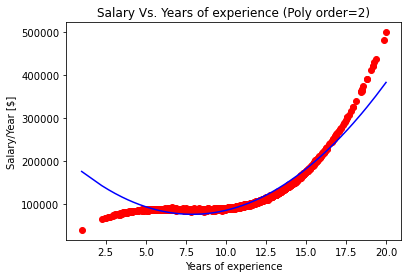

In [99]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,y_predict,color='blue')
plt.xlabel('Years of experience')
plt.ylabel('Salary/Year [$]')
plt.title('Salary Vs. Years of experience (Poly order=2)')

Text(0.5, 1.0, 'Salary Vs. Years of experience (Poly order=5)')

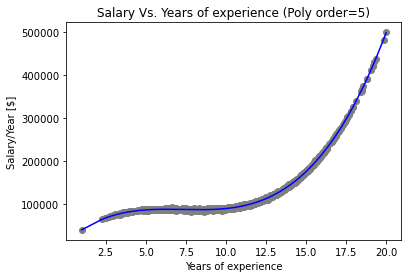

In [109]:
plt.scatter(X_train,y_train,color='gray')
plt.plot(X_train,y_predict,color='blue')
plt.xlabel('Years of experience')
plt.ylabel('Salary/Year [$]')
plt.title('Salary Vs. Years of experience (Poly order=5)')